### Modules
- 🔌 load_ext: conecta módulos automaticamente
- 🔁 autoreload 2: actualiza resultados de load_ext a cada celda

In [2]:
%load_ext autoreload 
%autoreload 2 

### RootPath: Set Working Directory to Project Root


In [3]:
from pathlib import Path
import os

class RootPath:
    def __init__(self, marker=".here", root="."):
        self.root = self.resolve(Path(root), marker)
        print(f"Now you are here: {self.root}")

    def resolve(self, start_path: Path, marker: str) -> str:
        search_path = start_path.resolve()
        for directory in [search_path] + list(search_path.parents):
            marker_path = directory / marker
            if marker_path.exists():
                return str(directory)

        raise FileNotFoundError(
            f"Marker file '{marker}' not found.\n"
            f"Please create a '{marker}' file at the project root.\n"
            f"Search started from: {search_path}\n"
        )

    def __str__(self):
        return self.root

# Create instance -> finds the project root
project_root = RootPath()
root_path = Path(str(project_root))

# Change the current working directory to the project root
os.chdir(root_path)

# Confirm current working directory
print("Current working directory:", Path.cwd())


Now you are here: /home/jayrd/wks-git/data_science_portfolio/ds_missing_data
Current working directory: /home/jayrd/wks-git/data_science_portfolio/ds_missing_data


In [4]:
import pandas as pd
import numpy as np
import ydata_profiling

# Implementations
from src.core.implementations.sample_run import SampleDF
from src.core.implementations.correlation_columns_run import CorrColumns
from src.core.implementations.corr_filterproxy_run import CorrFilterProxy
from src.core.implementations.corr_plotter_run import CorrPlotter
import src.core.implementations.null_report_run #missing accesor Implt


>>> registering accessor 'missing'


#### Load data with pre-normalization for missing values

In [5]:
# Build the file path in a way that works across different operating systems
csv_path_ocean = os.path.join(os.getcwd(), "data", "ocean.csv")

common_na_strings = [
    "missing", "NA", "N A", "N/A", "#N/A", "NA ", " NA", "N /A", "N / A", " N / A",
    "N / A ", "na", "n a", "n/a", "na ", " na", "n /a", "n / a", " a / a", "n / a ",
    "NULL", "null", "", "?", "*", "."
]
common_na_numbers = [-9, -99, -999, -9999, 9999, 66, 77, 88, -1]

df_original = pd.read_csv(csv_path_ocean, na_filter=True, na_values=common_na_numbers+common_na_strings)
df_original = df_original.iloc[:, 1:] #Elimina columna Unnamed: 0'
df = df_original.copy(deep=True)


In [6]:
import pandas as pd

df1 = pd.DataFrame({
  'key': ['A', 'B', 'C'],
  'value1': [1,2,3]
})

df2 = pd.DataFrame({
  'key': ['B', 'C', 'D'],
  'value2': [4,5,6]
})



In [7]:
inner_merged = pd.merge(df1, df2, on='key', how='left')

inner_merged

,key,value1,value2
0,A,1,NaN
1,B,2,4.0
2,C,3,5.0


In [42]:
rng = np.random.default_rng(42)
dates = pd.date_range(start='2025-01-01', end='2025-12-31', freq='D')
sales = rng.integers(low=5,high=200,size=(len(dates)))
dataframe = pd.DataFrame({
    'dates': dates,
    'sales': sales
})

df = dataframe.set_index(keys=dates).iloc[:,1:]
df1 = df.resample('M').agg(
    venta_total = ('sales','sum'),
    promedio = ('sales','sum'),
    maximo = ('sales', 'max'),
    n_ops = ('sales','size')
)

df1

/tmp/ipykernel_1524/3480440306.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df1 = df.resample('M').agg(


,venta_total,promedio,maximo,n_ops
2025-01-31,3420,3420,195,31
2025-02-28,2858,2858,194,28
2025-03-31,3354,3354,193,31
2025-04-30,3078,3078,180,30
2025-05-31,3206,3206,198,31
2025-06-30,3093,3093,199,30
2025-07-31,3145,3145,193,31
2025-08-31,2979,2979,181,31
2025-09-30,2697,2697,197,30
2025-10-31,3146,3146,191,31


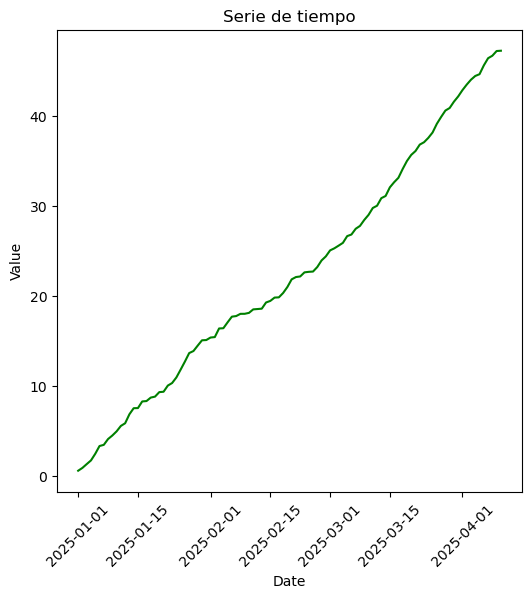

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


dates = pd.date_range(start='2025-01-01', periods=100)
values = np.random.rand(100).cumsum()
df = pd.DataFrame({
    'Dates':dates,
    'Values':values
})

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df['Dates'], df['Values'], color='green')

plt.xticks(rotation=45)
plt.title('Serie de tiempo')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

/tmp/ipykernel_1524/860391791.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2025-01-01', periods=12, freq='M')


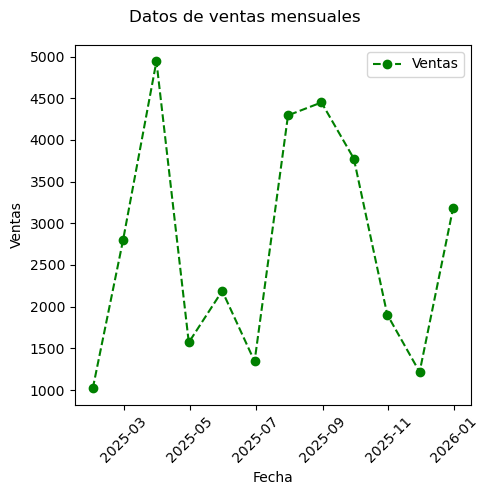

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados
dates = pd.date_range(start='2025-01-01', periods=12, freq='M')
values = np.random.randint(low=1000, high=5000, size=len(dates))
df = pd.DataFrame({'Dates': dates, 'Values': values})

# Gráfico
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(df['Dates'], df['Values'], marker='o', linestyle='--', color='green', label='Ventas')

# Etiquetas y estilo
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas')
ax.tick_params(axis='x', rotation=45)
fig.suptitle('Datos de ventas mensuales')
ax.legend()

# Ajuste visual
fig.tight_layout()
plt.show()
